In [1]:
pip install sqlalchemy

In [2]:
import pandas as pd
import scipy.stats as stats

  MonthYear  GoodLeads  BadLeads  LeadQualityRate
0   2009-04       79.0      57.0          15.2510
1   2009-05       59.0      57.0          10.1724
2   2009-06       86.0     141.0          14.1215
3   2009-07       49.0     110.0           9.2105
4   2009-08       62.0      67.0          14.1553


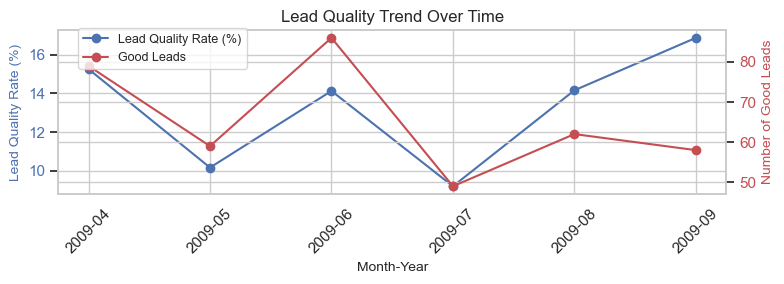

Chi-square statistic: 30.663202318024208, p-value: 1.091631401653597e-05
Significant trend in lead quality over time!


In [18]:
from sqlalchemy import create_engine
import urllib.parse

import matplotlib.pyplot as plt
import seaborn as sns

# Your database credentials
username = "root"
password = "********"  # This contains '@'
host = "localhost"
database = "aarki_proj"

# Encode the password
encoded_password = urllib.parse.quote_plus(password)

# Create connection string with the encoded password
db_path = f"mysql+pymysql://{username}:{encoded_password}@{host}/{database}"

# Create SQLAlchemy engine
engine = create_engine(db_path)

# Run SQL query
query = "SELECT * FROM dataset"
df = pd.read_sql(query, engine)

# Display result to check the data
#print(df.head(5))

query = """
SELECT DATE_FORMAT(`LeadCreated`, '%%Y-%%m') AS MonthYear,
       SUM(CASE WHEN LeadQuality = 'Good' THEN 1 ELSE 0 END) AS GoodLeads,
       SUM(CASE WHEN LeadQuality = 'Bad' THEN 1 ELSE 0 END) AS BadLeads,
       (sum(case when LeadQuality = 'Good' then 1 else 0 end) / count(*)) * 100 as LeadQualityRate
FROM dataset
GROUP BY MonthYear
ORDER BY MonthYear;
"""
# Read data into pandas DataFrame
df = pd.read_sql(query, engine)

# Display result
print(df.head())

# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(8, 3))

# Plot Lead Quality Rate on the primary y-axis
ax1.plot(df['MonthYear'], df['LeadQualityRate'], label='Lead Quality Rate (%)', marker='o', linestyle='-', color='b')
ax1.set_xlabel('Month-Year', fontsize=10)
ax1.set_ylabel('Lead Quality Rate (%)', fontsize=10, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Create a secondary y-axis for Good Leads
ax2 = ax1.twinx()
ax2.plot(df['MonthYear'], df['GoodLeads'], label='Good Leads', marker='o', linestyle='-', color='r')
ax2.set_ylabel('Number of Good Leads', fontsize=10, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title
plt.title('Lead Quality Trend Over Time', fontsize=12)

# Add legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), fontsize=9)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Perform Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(df[['GoodLeads', 'BadLeads']])

# Print results
print(f"Chi-square statistic: {chi2}, p-value: {p}")

# Check significance level (0.05)
if p < 0.05:
    print("Significant trend in lead quality over time!")
else:
    print("No significant trend detected.")
    